In [ ]:
!pip install kaggle

In [ ]:
import os
import shutil
import zipfile
import pandas as pd
import sqlite3

# Определяем пути источника и назначения
source_path = '/content/sample_data/kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# # Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [ ]:
!kaggle datasets download -d zadafiyabhrami/global-crocodile-species-dataset

Dataset URL: https://www.kaggle.com/datasets/zadafiyabhrami/global-crocodile-species-dataset
License(s): apache-2.0
global-crocodile-species-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# распаковка скачанного архива
with zipfile.ZipFile('global-crocodile-species-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('global-crocodile-species-dataset')

df = pd.read_csv('/content/global-crocodile-species-dataset/crocodile_dataset.csv')

# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

   Observation ID                         Common Name         Scientific Name  \
0               1                 Morelet's Crocodile    Crocodylus moreletii   
1               2                  American Crocodile       Crocodylus acutus   
2               3                   Orinoco Crocodile  Crocodylus intermedius   
3               4                 Morelet's Crocodile    Crocodylus moreletii   
4               5  Mugger Crocodile (Marsh Crocodile)    Crocodylus palustris   

         Family       Genus  Observed Length (m)  Observed Weight (kg)  \
0  Crocodylidae  Crocodylus                 1.90                  62.0   
1  Crocodylidae  Crocodylus                 4.09                 334.5   
2  Crocodylidae  Crocodylus                 1.08                 118.2   
3  Crocodylidae  Crocodylus                 2.42                  90.4   
4  Crocodylidae  Crocodylus                 3.75                 269.4   

  Age Class      Sex Date of Observation Country/Region      Habitat

In [59]:
import sqlite3
import pandas as pd

# Подключение к базе данных
conn = sqlite3.connect('croco.db')
cursor = conn.cursor()

# Удаляем старую таблицу если существует
cursor.execute("DROP TABLE IF EXISTS crocodile")

# Создаем таблицу с правильной структурой на основе DataFrame
cursor.execute('''
CREATE TABLE crocodile (
    "Observation ID" INTEGER PRIMARY KEY,
    "Common Name" TEXT,
    "Scientific Name" TEXT,
    "Family" TEXT,
    "Genus" TEXT,
    "Observed Length (m)" REAL,
    "Observed Weight (kg)" REAL,
    "Age Class" TEXT,
    "Sex" TEXT,
    "Date of Observation" TEXT,
    "Country/Region" TEXT,
    "Habitat Type" TEXT,
    "Conservation Status" TEXT,
    "Observer Name" TEXT,
    "Notes" TEXT
)''')

# Загружаем данные из DataFrame
df.to_sql('crocodile', conn, if_exists='append', index=False)

print("Данные успешно загружены!")

cursor.execute('''SELECT "Common Name", "Age Class" FROM crocodile WHERE "Observed Length (m)" > 2''')
result = cursor.fetchall()
for row in result:
    print(row)

conn.commit()
conn.close()

Данные успешно загружены!
('American Crocodile', 'Adult')
("Morelet's Crocodile", 'Adult')
('Mugger Crocodile (Marsh Crocodile)', 'Adult')
('Mugger Crocodile (Marsh Crocodile)', 'Adult')
('Siamese Crocodile', 'Subadult')
('West African Crocodile', 'Adult')
("Morelet's Crocodile", 'Adult')
('Siamese Crocodile', 'Subadult')
('American Crocodile', 'Adult')
('Nile Crocodile', 'Adult')
('Borneo Crocodile (disputed)', 'Subadult')
('Nile Crocodile', 'Adult')
('Cuban Crocodile', 'Subadult')
('Nile Crocodile', 'Juvenile')
('Mugger Crocodile (Marsh Crocodile)', 'Adult')
('Orinoco Crocodile', 'Subadult')
('Siamese Crocodile', 'Adult')
('Orinoco Crocodile', 'Adult')
('Siamese Crocodile', 'Adult')
('American Crocodile', 'Adult')
('Cuban Crocodile', 'Adult')
('Philippine Crocodile', 'Adult')
('West African Slender-snouted Crocodile', 'Adult')
('West African Crocodile', 'Subadult')
('Mugger Crocodile (Marsh Crocodile)', 'Adult')
('Nile Crocodile', 'Subadult')
("Morelet's Crocodile", 'Adult')
("Morele

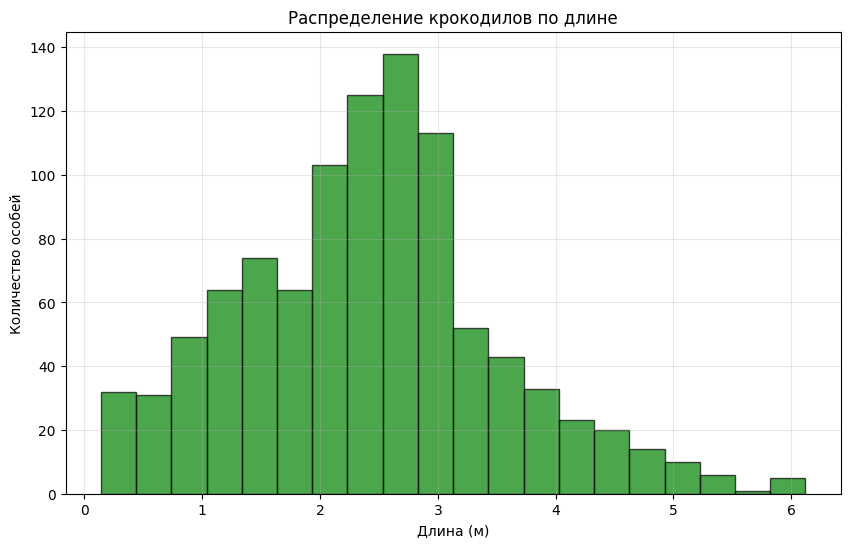

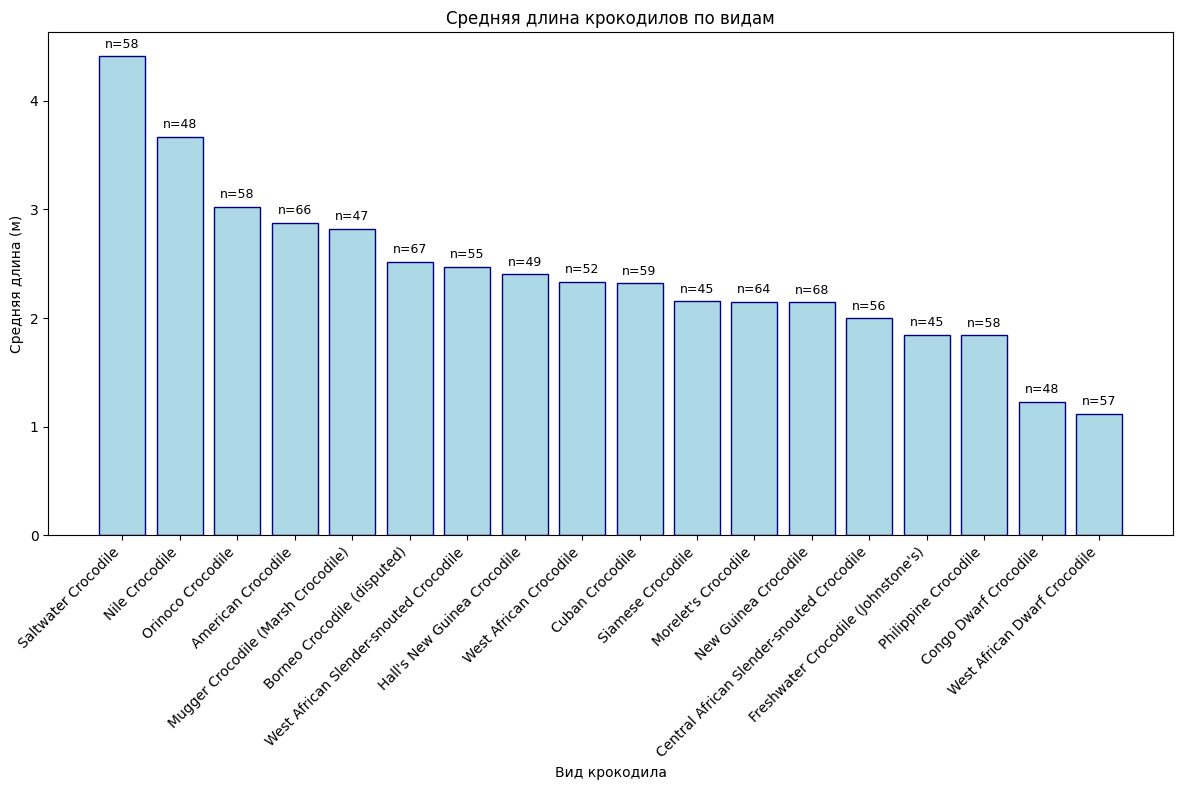

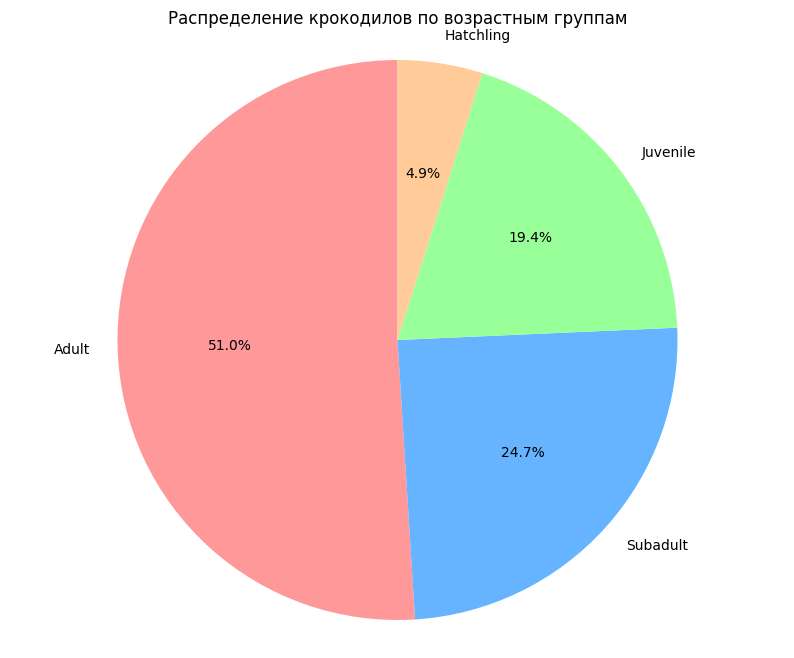

In [75]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

conn = sqlite3.connect('croco.db')
cursor = conn.cursor()

# Запрос: распределение по длине
query = '''
SELECT "Observed Length (m)" as length
FROM crocodile
WHERE "Observed Length (m)" IS NOT NULL
'''
df_length = pd.read_sql_query(query, conn)

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(df_length['length'], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Длина (м)')
plt.ylabel('Количество особей')
plt.title('Распределение крокодилов по длине')
plt.grid(alpha=0.3)
plt.show()


# Запрос: средняя длина по видам
query = '''
SELECT "Common Name", AVG("Observed Length (m)") as avg_length, COUNT(*) as count
FROM crocodile
WHERE "Observed Length (m)" IS NOT NULL
GROUP BY "Common Name"
HAVING COUNT(*) > 2
ORDER BY avg_length DESC
'''
cursor.execute(query)
results = cursor.fetchall()

# Подготовка данных для визуализации
species = [row[0] for row in results]
avg_lengths = [row[1] for row in results]
counts = [row[2] for row in results]

# Визуализация
plt.figure(figsize=(12, 8))
bars = plt.bar(species, avg_lengths, color='lightblue', edgecolor='navy')
plt.xlabel('Вид крокодила')
plt.ylabel('Средняя длина (м)')
plt.title('Средняя длина крокодилов по видам')
plt.xticks(rotation=45, ha='right')

# Добавляем подписи с количеством наблюдений
for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Запрос: распределение по возрастным группам
query = '''
SELECT "Age Class", COUNT(*) as count
FROM crocodile
WHERE "Age Class" IS NOT NULL AND "Age Class" != 'Unknown'
GROUP BY "Age Class"
ORDER BY count DESC
'''
cursor.execute(query)
results = cursor.fetchall()

# Визуализация
age_classes = [row[0] for row in results]
counts = [row[1] for row in results]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=age_classes, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Распределение крокодилов по возрастным группам')
plt.axis('equal')
plt.show()

conn.close()